# Exploratory Data Analysis

### Library and Load Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10

In [2]:
# Load CIFAR10 dataset
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


### Summarize Data

In [10]:
print("Training data shape: Number of images: %s, Image size: %s, rgb: %s" % (train_X.shape[0], train_X.shape[1:3], train_X.shape[3]))
print(f"Training labels shape: {train_Y.shape}")

print("Testing data shape: Number of images: %s, Image size: %s, rgb: %s" % (test_X.shape[0], test_X.shape[1:3], test_X.shape[3]))
print(f"Testing labels shape: {test_Y.shape}")

Training data shape: Number of images: 50000, Image size: (32, 32), rgb: 3
Training labels shape: (50000, 1)
Testing data shape: Number of images: 10000, Image size: (32, 32), rgb: 3
Testing labels shape: (10000, 1)


In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

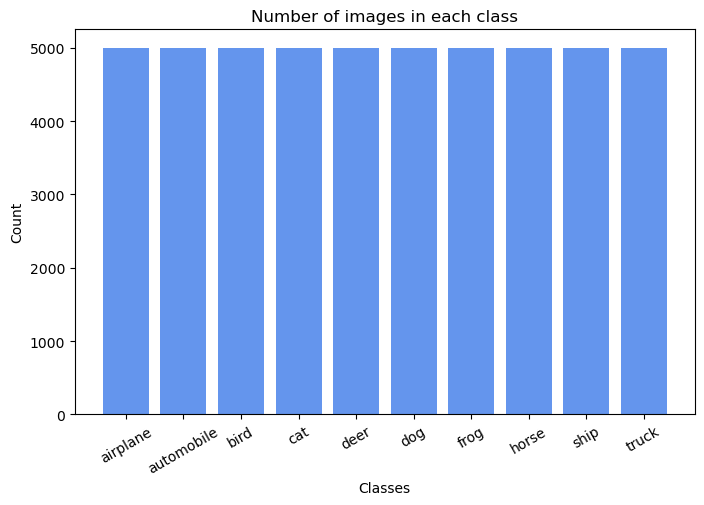

In [25]:
# Count the number of images in each class
unique, counts = np.unique(train_Y, return_counts=True)

# Plot the distribution
plt.figure(figsize=(8,5))
plt.bar(class_names, counts, color='#6495ED')
plt.xlabel('Classes')
plt.xticks(rotation=30,fontsize=10)  # Rotate x-axis labels for readability
plt.ylabel('Count')
plt.title('Number of images in each class')
plt.show()


### Image Examples

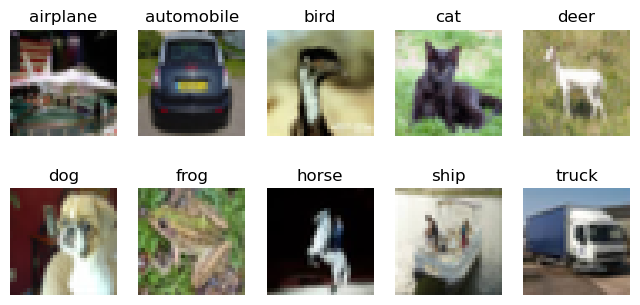

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8,5))

for i in range(10):
    idx = np.where(train_Y == i)[0]
    features_idx = train_X[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    img = features_idx[img_num,::]
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].set_title(class_names[i])
    ax[i//5, i%5].axis('off')

plt.subplots_adjust(hspace=-0.3)  # Increase the horizontal spacing
plt.show()


### Pixel intensity distribution

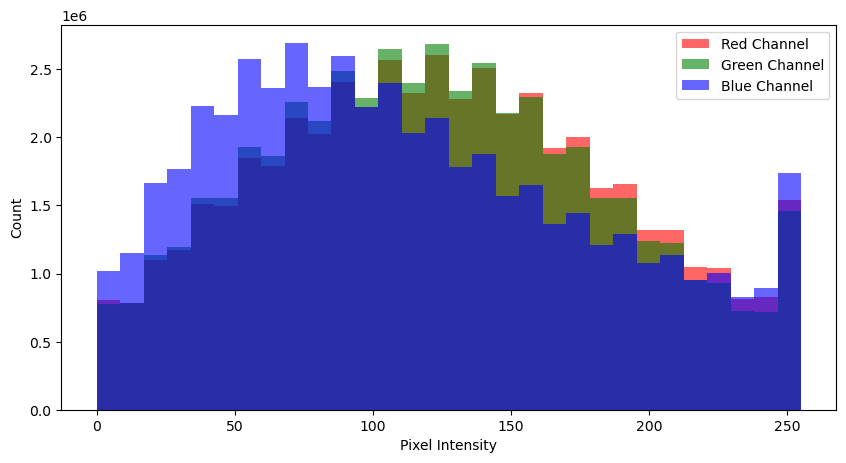

In [5]:
plt.figure(figsize=(10,5))

# Calculate pixel intensity distribution for a single color channel
pixel_intensities = train_X[:,:,:,0].flatten()
plt.hist(pixel_intensities, bins=30, color='red', alpha=0.6, label='Red Channel')

pixel_intensities = train_X[:,:,:,1].flatten()
plt.hist(pixel_intensities, bins=30, color='green', alpha=0.6, label='Green Channel')

pixel_intensities = train_X[:,:,:,2].flatten()
plt.hist(pixel_intensities, bins=30, color='blue', alpha=0.6, label='Blue Channel')

plt.xlabel('Pixel Intensity')
plt.ylabel('Count')
plt.legend()
plt.show()


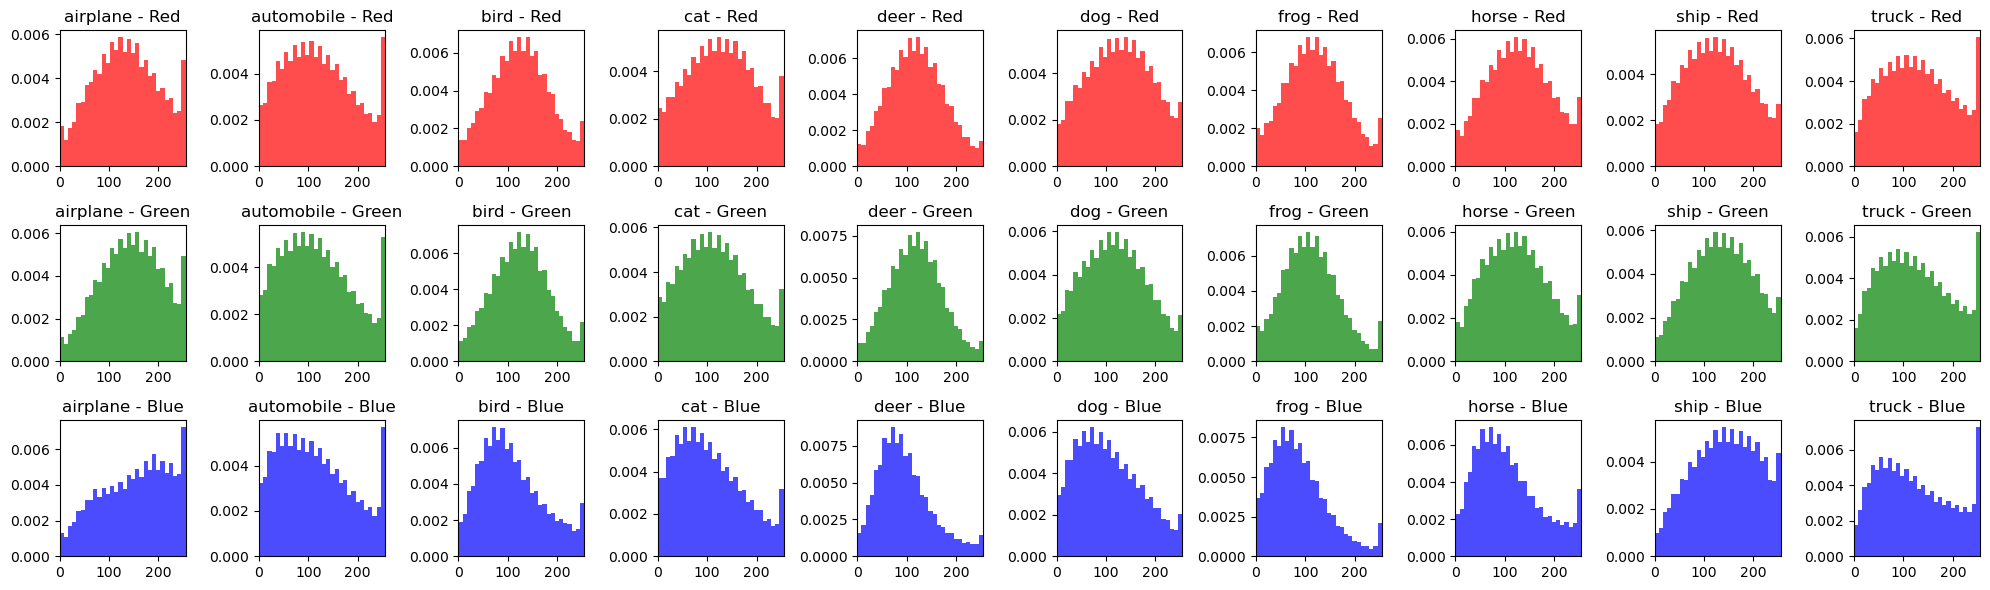

In [36]:
# Pixel intensity distribution for each class
fig, axs = plt.subplots(3, 10, figsize=(20, 6))
color_map = {0:'Red', 1:'Green', 2:'Blue'}

for i, color in color_map.items():
    for j, item in enumerate(class_names):
        # Select images of class j
        train_X_class = train_X[train_Y.flatten() == j]
        pixel_intensities = train_X_class[:,:,:,i].flatten() # Get pixel intensities for color channel i

        # Plot histogram
        axs[i,j].hist(pixel_intensities, bins=30, color=color.lower(), alpha=0.7, density=True)
        axs[i,j].set_title(f"{item} - {color}")
        axs[i,j].set_xlim([0,255])

plt.tight_layout()
plt.show()
